In [2]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import sys
import os
from PIL import Image

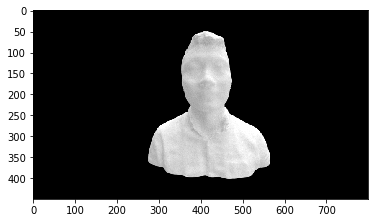

In [3]:
im = cv2.imread('data/1.tif', 0)

plt.imshow(im, cmap = 'gray')

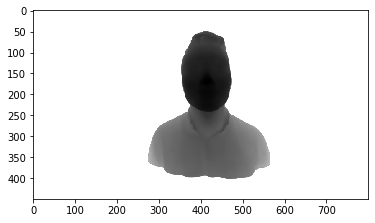

In [4]:
imz = cv2.imread('data/1z.tif', 0)

plt.imshow(imz, cmap = 'gray')

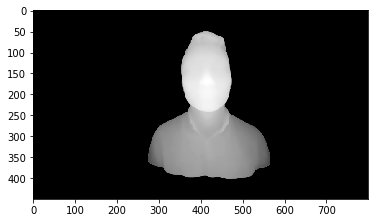

In [5]:
imzinv = 255 - imz

plt.imshow(imzinv, cmap = 'gray')

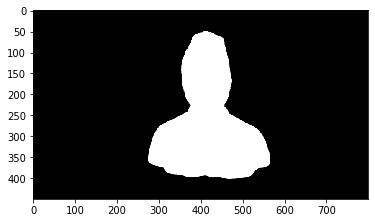

In [6]:
ima = cv2.imread('data/1a.tif', 0)

plt.imshow(ima, cmap = 'gray')

In [7]:
h, w = im.shape

In [8]:
print(im.shape)
print(imz.shape)

(450, 800)
(450, 800)


In [9]:
focalLength = 90.0
centerX = w / 2.0
centerY = h / 2.0
scalingFactor = 1000.0

Z = imzinv / scalingFactor

Xrang = np.arange(0,w,1)
Yrang = np.arange(0,h,1)
imXY = np.meshgrid(Xrang, Yrang)

print(imXY[0], imXY[1])

[[  0   1   2 ... 797 798 799]
 [  0   1   2 ... 797 798 799]
 [  0   1   2 ... 797 798 799]
 ...
 [  0   1   2 ... 797 798 799]
 [  0   1   2 ... 797 798 799]
 [  0   1   2 ... 797 798 799]] [[  0   0   0 ...   0   0   0]
 [  1   1   1 ...   1   1   1]
 [  2   2   2 ...   2   2   2]
 ...
 [447 447 447 ... 447 447 447]
 [448 448 448 ... 448 448 448]
 [449 449 449 ... 449 449 449]]


In [10]:


X = (imXY[0] - centerX) * Z / focalLength
Y = (imXY[1] - centerY) * Z / focalLength

Xworld = np.vstack((X.flatten(), Y.flatten(), Z.flatten())).T
# def generate_pointcloud(rgb_file,depth_file,ply_file):

#     rgb = Image.open(rgb_file)
#     depth = Image.open(depth_file).convert('I')

#     if rgb.size != depth.size:
#         raise Exception("Color and depth image do not have the same 
# resolution.")
#     if rgb.mode != "RGB":
#         raise Exception("Color image is not in RGB format")
#     if depth.mode != "I":
#         raise Exception("Depth image is not in intensity format")


#     points = []    
#     for v in range(rgb.size[1]):
#         for u in range(rgb.size[0]):
#             color = rgb.getpixel((u,v))
#             Z = depth.getpixel((u,v)) / scalingFactor
#             print(Z)
#             if Z==0: continue
#             X = (u - centerX) * Z / focalLength
#             Y = (v - centerY) * Z / focalLength
#             points.append("%f %f %f %d %d %d 0\n"% 
                   
print(Xworld.shape)

(360000, 3)


In [11]:
Xworld

array([[-0., -0.,  0.],
       [-0., -0.,  0.],
       [-0., -0.,  0.],
       ...,
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

In [27]:
Xworldsimple = Xworld[::18]
len(Xworldsimple)

20000

Text(0.5, 0.92, 'Recovered World Points')

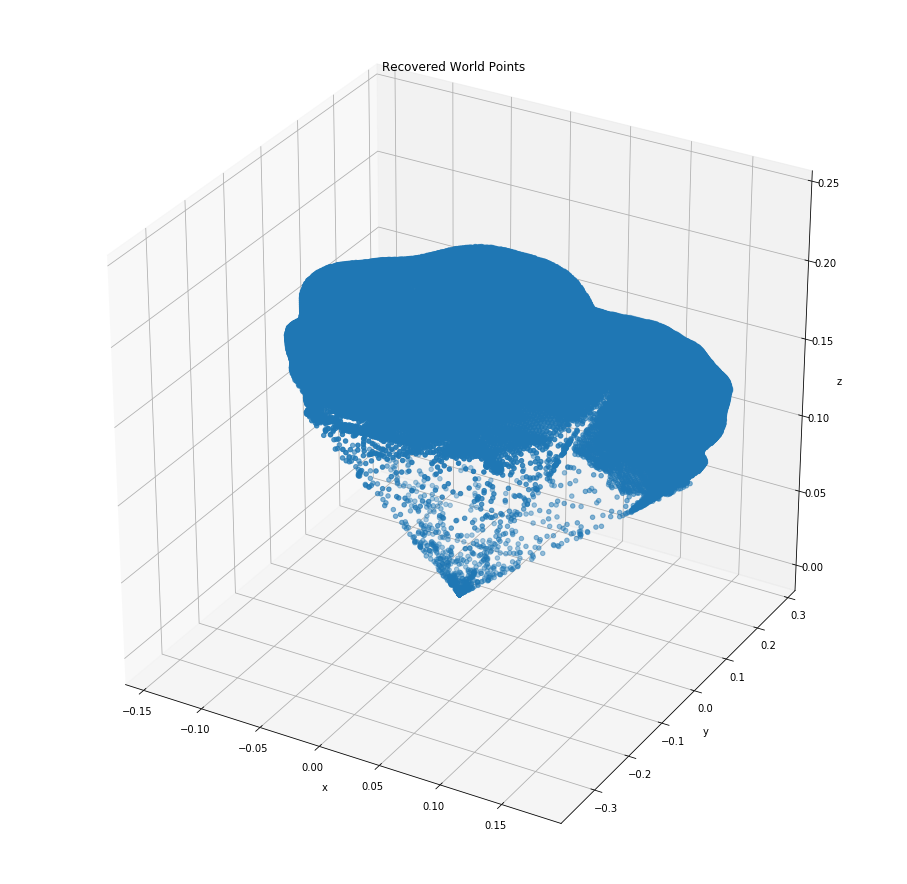

In [28]:
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

plt.figure(figsize=(16,16))
ax = plt.axes(projection='3d')
ax.scatter(Xworld[:,0],Xworld[:,1],Xworld[:,2])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Recovered World Points')

In [29]:
points = []   

for index, i in enumerate(Xworldsimple):
    points.append("%f %f %f %d %d %d 0\n"%(i[0],i[1],i[2], im.flatten()[index],im.flatten()[index],im.flatten()[index]))

ply_file = 'data/1small.ply'   
file = open(ply_file,"w")
file.write('''ply
format ascii 1.0
element vertex %d
property float x
property float y
property float z
property uchar red
property uchar green
property uchar blue
property uchar alpha
end_header
%s
'''%(len(points),"".join(points)))
file.close()

In [15]:
pd.DataFrame(Xworld, columns = ['X', 'Y', 'Z'])

,X,Y,Z
0,-0.0,-0.0,0.0
1,-0.0,-0.0,0.0
2,-0.0,-0.0,0.0
3,-0.0,-0.0,0.0
4,-0.0,-0.0,0.0
...,...,...,...
359995,0.0,0.0,0.0
359996,0.0,0.0,0.0
359997,0.0,0.0,0.0
359998,0.0,0.0,0.0


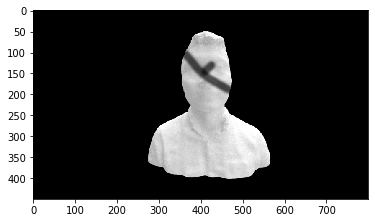

In [16]:
immod = cv2.imread('data/1mod.tif', 0)

plt.imshow(immod, cmap = 'gray')

In [17]:
focalLength = 90.0
centerX = w / 2.0
centerY = h / 2.0
scalingFactor = 1000.0

Z = imzinv / scalingFactor

Xrangmod = np.arange(0,w,1)
Yrangmod = np.arange(0,h,1)
imXYmod = np.meshgrid(Xrangmod, Yrangmod)

print(imXYmod[0], imXYmod[1])

[[  0   1   2 ... 797 798 799]
 [  0   1   2 ... 797 798 799]
 [  0   1   2 ... 797 798 799]
 ...
 [  0   1   2 ... 797 798 799]
 [  0   1   2 ... 797 798 799]
 [  0   1   2 ... 797 798 799]] [[  0   0   0 ...   0   0   0]
 [  1   1   1 ...   1   1   1]
 [  2   2   2 ...   2   2   2]
 ...
 [447 447 447 ... 447 447 447]
 [448 448 448 ... 448 448 448]
 [449 449 449 ... 449 449 449]]


In [18]:


Xmod = (imXYmod[0] - centerX) * Z / focalLength
Ymod = (imXYmod[1] - centerY) * Z / focalLength

Xworldmod = np.vstack((Xmod.flatten(), Ymod.flatten(), Z.flatten())).T
# def generate_pointcloud(rgb_file,depth_file,ply_file):

#     rgb = Image.open(rgb_file)
#     depth = Image.open(depth_file).convert('I')

#     if rgb.size != depth.size:
#         raise Exception("Color and depth image do not have the same 
# resolution.")
#     if rgb.mode != "RGB":
#         raise Exception("Color image is not in RGB format")
#     if depth.mode != "I":
#         raise Exception("Depth image is not in intensity format")


#     points = []    
#     for v in range(rgb.size[1]):
#         for u in range(rgb.size[0]):
#             color = rgb.getpixel((u,v))
#             Z = depth.getpixel((u,v)) / scalingFactor
#             print(Z)
#             if Z==0: continue
#             X = (u - centerX) * Z / focalLength
#             Y = (v - centerY) * Z / focalLength
#             points.append("%f %f %f %d %d %d 0\n"% 
                   
print(Xworldmod.shape)

(360000, 3)


(450, 800)


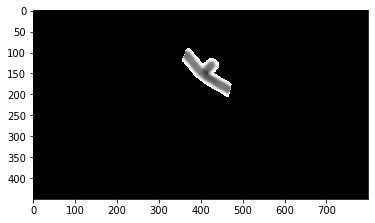

In [19]:
imdiff = np.abs(immod - im)
print(imdiff.shape)
plt.imshow(imdiff, cmap = 'gray')

In [20]:
Xworldmod = Xworldmod[np.where(imdiff.flatten() != 0)]

In [21]:
Xworldmod.shape

(5645, 3)

Text(0.5, 0.92, 'Recovered World Points')

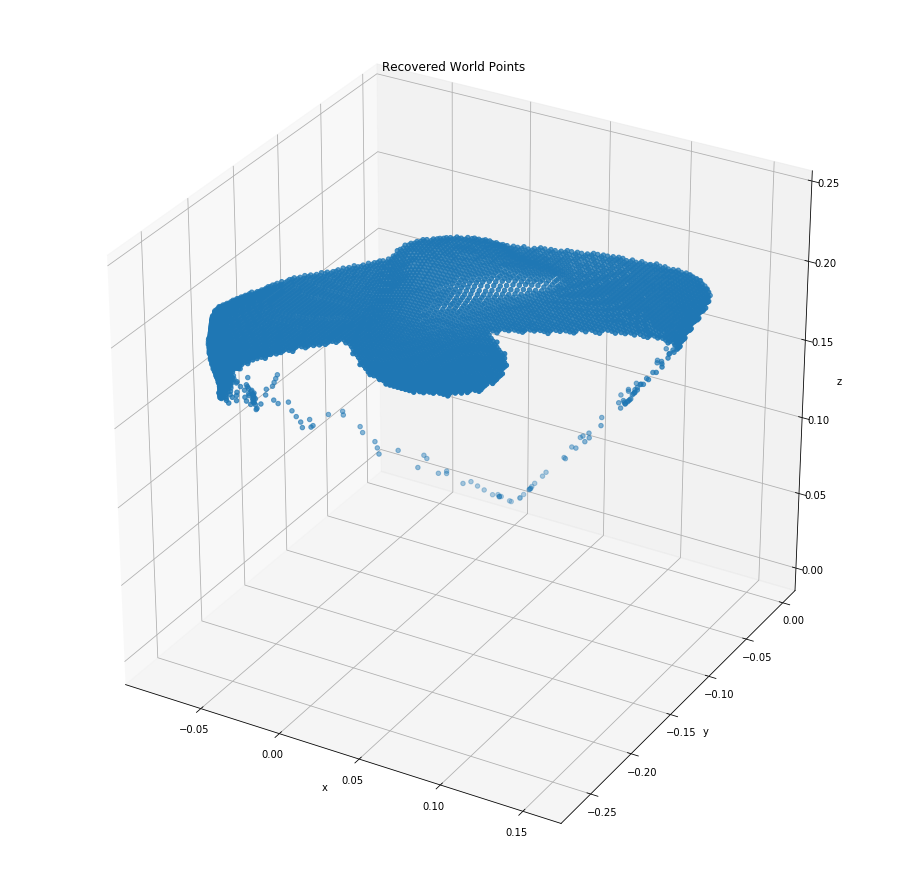

In [22]:
plt.figure(figsize=(16,16))
ax = plt.axes(projection='3d')
ax.scatter(Xworldmod[:,0],Xworldmod[:,1],Xworldmod[:,2])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Recovered World Points')

In [23]:
points = []   

for index, i in enumerate(Xworldmod):
    points.append("%f %f %f %d %d %d 0\n"%(i[0],i[1],i[2], im.flatten()[index],im.flatten()[index],im.flatten()[index]))

ply_file = 'data/1mask.ply'   
file = open(ply_file,"w")
file.write('''ply
format ascii 1.0
element vertex %d
property float x
property float y
property float z
property uchar red
property uchar green
property uchar blue
property uchar alpha
end_header
%s
'''%(len(points),"".join(points)))
file.close()

In [24]:
Xworldmodsimple = Xworldmod[::18]

In [26]:
points = []   

for index, i in enumerate(Xworldmodsimple):
    points.append("%f %f %f %d %d %d 0\n"%(i[0],i[1],i[2], im.flatten()[index],im.flatten()[index],im.flatten()[index]))

ply_file = 'data/1masksmall.ply'   
file = open(ply_file,"w")
file.write('''ply
format ascii 1.0
element vertex %d
property float x
property float y
property float z
property uchar red
property uchar green
property uchar blue
property uchar alpha
end_header
%s
'''%(len(points),"".join(points)))
file.close()